# Time dependent data / Welding current and voltage

[<< PREVIOUS TUTORIAL](01_01_introduction.ipynb) | [NEXT TUTORIAL >>](01_03_geometry.ipynb)

## Overview

**This tutorial covers:**

- Accessing and visualizing time dependent data stored inside a `TimeSeries` class

**Requirements:**

- Opening and navigating through WelDX files ([tutorial](01_01_introduction.ipynb))

In [1]:
# download the example file for this tutorial

from util import download_tutorial_input_file

download_tutorial_input_file(print_status=False)

## Plotting data


Two important quantities in welding applications are the welding current and welding voltage.
Both are constantly monitored during an experiment.
The obtained data is a one dimensional array with time being its only dimension.
We will extract both from the file and see what we can do with it.
First we read the file and get an overview over its content as we learned in the previous tutorial:

In [2]:
from weldx import WeldxFile

wxfile = WeldxFile("single_pass_weld.wx")

c:\users\vhirtham\pycharmprojects\bam\libo\libo\__init__.py:29: UserWarning: Using local libo package files without version information.
Consider running 'python setup.py --version' or 'pip install -e .' in the libo root repository
  warnings.warn(
c:\users\vhirtham\pycharmprojects\bam\libo\libo\__init__.py:29: UserWarning: Using local libo package files without version information.
Consider running 'python setup.py --version' or 'pip install -e .' in the libo root repository
  warnings.warn(
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\asdf\asdf.py:329: AsdfWarning: File 'file:///C:/Users/vhirtham/PycharmProjects/bam/weldx/tutorials/single_pass_weld.wx' was created with extension URI 'asdf://weldx.bam.de/weldx/extensions/weldx-0.1.0' (from package weldx==0.5.0), which is not currently installed
  warnings.warn(msg, AsdfWarning)


In [3]:
wxfile.info()

root (dict)
├─TCP (LocalCoordinateSystem)
├─coordinate_systems (CoordinateSystemManager)
├─equipment (list)
│ ├─[0] (MeasurementEquipment)
│ ├─[1] (MeasurementEquipment)
│ └─[2] (MeasurementEquipment)
├─measurements (list)
│ ├─[0] (Measurement)
│ ├─[1] (Measurement)
│ ├─[2] (Measurement)
│ └─[3] (Measurement)
├─process (dict)
│ ├─shielding_gas (ShieldingGasForProcedure)
│ ├─weld_speed (TimeSeries)
│ ├─welding_process (GmawProcess)
│ └─welding_wire (dict)
│   ├─class (str)
│   ├─diameter (Q_)
│   └─wx_user (dict)
│     ├─charge id (str)
│     └─manufacturer (str)
├─reference_timestamp (Timestamp)
├─welding_current (TimeSeries)
├─welding_voltage (TimeSeries)
├─workpiece (dict)
│ ├─base_metal (dict)
│ │ ├─common_name (str)
│ │ └─standard (str)
│ └─geometry (dict)
│   ├─groove_shape (VGroove)
│   └─seam_length (Q_)
└─wx_user (dict)
  ├─WID (int)
  ├─operator (str)
  └─project (str)


As we can see in the list, there are the top level items `welding_current` and `welding_voltage`.
Let's have a look at the welding current first:

In [4]:
current = wxfile["welding_current"]

The object we extracted is of type `TimeSeries` as can be seen in the `info` output.
This is a special type provided by WelDX to deal with time dependent data.

To see a plot of the `TimeSeries` simply call the built-in `.plot()` function.
If you are already familiar with `matplotlib` it is also easy to generate your own plots. We show how to access the underlying data later in this tutorial.


<AxesSubplot:xlabel='t in s', ylabel='values in A'>

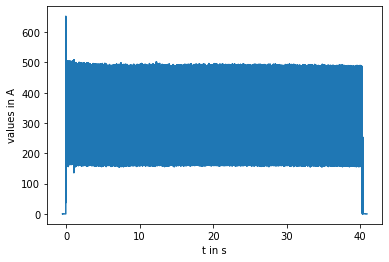

In [5]:
current.plot()

The `plot` method is an easy and convenient way to quickly visualize a `TimeSeries`.
It labels the axes automatically and attaches the corresponding units to them.

Depending on the Python environment you are using, there are some things to consider.
Since the `plot` method uses `matplotlib` internally, you have to call the `matplotlib.pyplot.show` function manually after using `plot` when running a regular Python script file.
Otherwise, the plot won't show up.

This is not the case if you work with a jupyter notebook, where the plots are generated after each cell execution.
However, while a regular script will open an interactive window for each plot, the plots inside a notebook can't be modified without additional commands.
To enable interactive `matplotlib` plots inside a jupyter notebook, uncomment and run the following magic command:

In [6]:
# %matplotlib widget

Now let's plot the welding voltage. 
Try to interact with the plot if you are running this tutorial as a jupyter notebook.

> HINT: Remember that you can run the code of this tutorial by clicking on the binder link at the beginning

<AxesSubplot:xlabel='t in s', ylabel='values in V'>

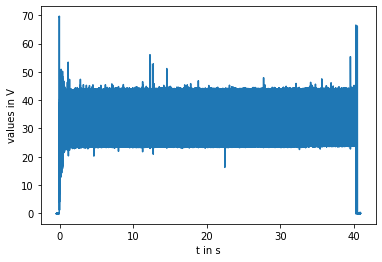

In [7]:
voltage = wxfile["welding_voltage"]
voltage.plot()

## Accessing the data 

Now that we know how to get a quick overview over the data by visualizing it with the `plot` method, let's have a look on what else we can do with a `TimeSeries`.
While any number of dimensions in addition to time are supported, we expect the welding current to have no further dimensions.
We can easily check this using the `shape` property:

In [8]:
current.shape

(414091,)

From the returned value we see that the data indeed only consists of a single dimension.
Furthermore, we get the exact number of data points that are stored in the time series.

We already saw in the axes labeling of the plots, that the `TimeSeries` also stores the units of the data 
We can get it by calling the `units` property:

In [9]:
current.units

<Unit('ampere')>

As one might expect, the unit of the current is amperes, but it might also have been stored in milliamperes.

Now, if we want to actually access the stored data, we can extract it from the `TimeSeries` by using its `data` property.
The returned object is a `pint.Quantity`.


In [10]:
type(current.data)

pint.quantity.build_quantity_class.<locals>.Quantity

A `pint.Quantity` is a thin wrapper around a multi-dimensional array that attaches units to the contained data.
They can be used like NumPy arrays and support most of NumPy's functions.
For further information on how to work with quantities, consult [Pint's documentation](https://pint.readthedocs.io/en/stable/).

An alternative to the `data` property is the `data_array` property.
This returns the data as `xarray.DataArray`:

In [11]:
type(current.data_array)

xarray.core.dataarray.DataArray

Xarray is a powerful tool that makes working with multi-dimensional arrays easier.
When performing operations on an `xarray.DataArray`, it automatically figures out which dimensions of the operands are compatible with each other and how they need to be combined.
Visit [the xarray documentation](http://xarray.pydata.org/en/stable/) to learn how to work with xarray classes.

We recommend using either xarray or pint when working with the data, but if you feel more comfortable using NumPy, you can convert both types easily to a `numpy.ndarray`.
For pint use `.magnitude` or the short version `.m`:

In [12]:
type(current.data.magnitude)

numpy.ndarray

For xarray use `.data` to get the data as `pint.Quantity` and then `.magnitude` or `.m` to receive a `numpy.ndarray`:

In [13]:
type(current.data_array.data.magnitude)

numpy.ndarray

## Data processing examples

Before we conclude this lesson, we will show you some simple examples on how to process the data obtained from a weldx file.
Pint and Xarray both offer you some basic functions to get the minimal and maximal values of a dataset or to calculate its mean value.
Here are the examples for Pint:

In [14]:
current.data.min()

array(-0.30517578) <Unit('ampere')>

In [15]:
current.data.max()

array(652.6184082) <Unit('ampere')>

In [16]:
current.data.mean()

array(359.01679669) <Unit('ampere')>

If you exchange `.data` with `.data_array`, you will get the same results just as `xarray.DataArray`.

To demonstrate you some features of Xarray and Pint, we will now do a more involved computation by calculating the electric power using the equation:

$$ P = \frac{1}{T} \int_{t=0}^{T} u \cdot i \;\mathrm{d} t$$

$u$ is the time dependent current,  $i$ the time dependent voltage, $t$ the time and $T$ the duration of the measurement.
We will do this step by step to keep it simple and to discuss all the things that need to be considered.
First we will calculate the integral with [Xarrays `.integrate` function](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.integrate.html) which uses the trapezoidal rule.

In [17]:
integral = (voltage.data_array * current.data_array).integrate(
    "time", datetime_unit="s"
)
integral

<xarray.DataArray ()>
<Quantity(486682.2425141883, 'ampere * volt')>

The parameter `datetime_unit` specifies the unit of the time coordinates during the integration.
Unfortunately, at the time of writing of this tutorial, the unit support of Xarray is still work in progress and not fully implemented.
The result's unit is just $\mathrm{A \cdot V}$ while it should have been $\mathrm{A \cdot V \cdot s}$.
We correct this by turning the resulting `xarray.DataArray` into a `pint.Quantity` (see previous section) and simply multiplying the missing unit.
Therefore we need to import the unit object `U_` from weldx.

In [18]:
from weldx import U_

q_integral = integral.data * U_("s")

What remains now is to divide the result by the process duration.
We can get the time data either from the voltage or the current data as they were both measured simultaneously.
It can be accessed with `.time` which returns a `weldx.Time` instance.
We will talk a bit more about this class in another tutorial.
For now it is sufficient to know, that it provides a `.duration` method to get the duration of the contained time data as a new `weldx.Time` instance and that we can turn it into a quantity using `.as_quantity`.
So let's finally calculate the electrical power:

In [19]:
e_power = q_integral / voltage.time.duration.as_quantity()
e_power

array(11753.05471067) <Unit('ampere * volt')>

We can further simplify this by convert the units manually to Watt with `.to` or `.ito`.
The first method creates a new quantity, while the latter one modifies the existing one.

In [20]:
e_power.ito("W")
e_power

array(11753.05471067) <Unit('watt')>

If you prefer compact numbers, you can use `.to_compact`:

In [21]:
e_power.to_compact()

C:\Users\vhirtham\AppData\Local\Temp\ipykernel_604\1330626161.py:1: RuntimeWarning: to_compact applied to non numerical types has an undefined behavior.
  e_power.to_compact()


array(11753.05471067) <Unit('watt')>

## Conclusion

This concludes the tutorial about accessing and plotting time dependent data.
We have learned about some basic functionalities of the `TimeSeries` class and know now, how to get the data for further processing and how to quickly visualize it, using the `plot` method.

## Further readings

- [API tutorial: <code>TimeSeries</code>](timeseries_01.ipynb)

[<< PREVIOUS TUTORIAL](01_01_introduction.ipynb) | [NEXT TUTORIAL >>](01_03_geometry.ipynb)